In [1]:
from models import *
from syntheticEx import *
import numpy as no
from tensorflow.keras.models import Model, Sequential, load_model
import matplotlib.pyplot as plt

In [2]:
x, y = create_model_alternative()
model = Model(x, y)
model.load_weights("model/deepAugMUSIC_d2.h5")

In [3]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 16, 200)]            0         []                            
                                                                                                  
 permute (Permute)           (None, 200, 16)              0         ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 200, 16)              64        ['permute[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 gru (GRU)                   (None, 16)                   1632      ['batch_normalization[0][0

In [4]:
testX, test_doas = create_dataset('m8/d5_l200_snr10_5k_c_test', 100, coherent=True)

testX_real = np.real(testX)
testX_imag = np.imag(testX)
testX = np.concatenate((testX_real, testX_imag), axis=1)

100%|██████████| 100/100 [00:00<00:00, 1712.87it/s]


1/1 [==============================] - 10s 10s/step
Predicted : [[ 1.200669  -1.3186418]]
Actual : [-0.39414384  1.41596075]


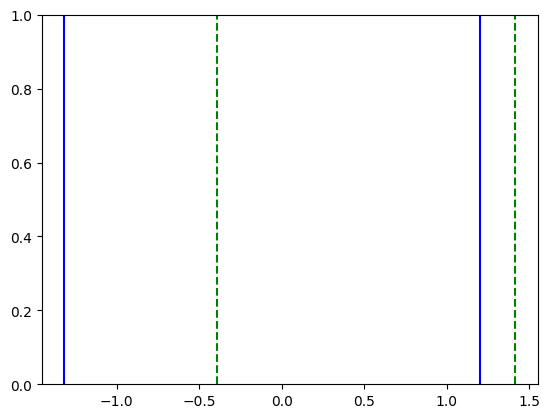

In [5]:
sample_id = 0
predicted_doas = model.predict(testX[sample_id][np.newaxis])

for theta in predicted_doas.flatten():
    plt.axvline(theta, color='blue')

for theta in test_doas[sample_id].flatten():
    plt.axvline(theta, color='green', linestyle='--')
    
print("Predicted :", predicted_doas)
print("Actual :", test_doas[sample_id])

In [6]:
predictions = model.predict(testX)

4/4 [==============================] - 0s 59ms/step


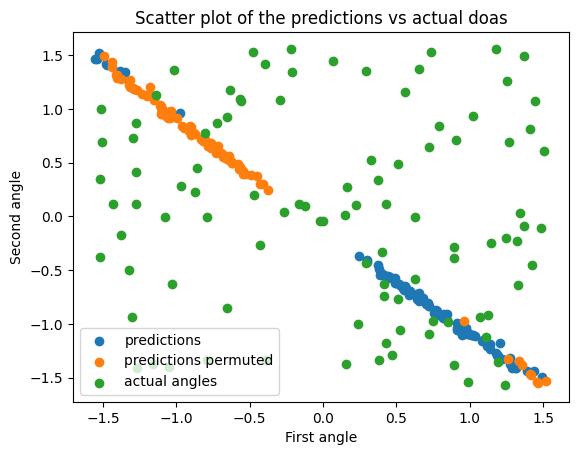

In [7]:
mod_pred = (predictions + np.pi/2) % np.pi - np.pi/2

plt.scatter(mod_pred[:, 0], mod_pred[:, 1], label="predictions")
plt.scatter(mod_pred[:, 1], mod_pred[:, 0], label="predictions permuted")
plt.scatter(test_doas[:, 0], test_doas[:, 1], label="actual angles")

plt.xlabel("First angle")
plt.ylabel("Second angle")
plt.title("Scatter plot of the predictions vs actual doas")
plt.legend()
plt.savefig("DA-MUSIC_2_sources")